In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')


In [3]:
## data available
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Splitting the data to corresponding x,y

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
X.shape

(10000, 10)

In [6]:
#Create dummy variables  or one hot encoding

geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [8]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
X_train.shape

(7000, 11)

In [11]:
X_test.shape

(3000, 11)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
## iam importing the libraries and packages direct from keras because im using tensorflow >2.0

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

## We Are Creating the Basic Model of ANN

In [14]:
# Initialising the ANN
# From the definition of Keras documentation the Sequential model is a linear stack of layers.

classifier = Sequential()

In [15]:
# Adding the input layer and the first hidden layer and this layer has 11 inputs from the data (x_train,x_test)

classifier.add(Dense(6, kernel_initializer = "he_uniform",  input_shape=(11,),activation='relu'))


In [16]:
# Adding the second hidden layer
classifier.add(Dense( 6,kernel_initializer = "he_uniform", activation='relu'))
# Adding the output layer
classifier.add(Dense( 1, kernel_initializer = "glorot_uniform", activation = 'sigmoid'))


In [17]:
# Compiling the ANN
classifier.compile( optimizer = 'Adam', 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy']
                  )

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10,verbose = 2)


Epoch 1/10
469/469 - 1s - loss: 0.5057 - accuracy: 0.7884 - val_loss: 0.4728 - val_accuracy: 0.7962
Epoch 2/10
469/469 - 1s - loss: 0.4470 - accuracy: 0.7991 - val_loss: 0.4535 - val_accuracy: 0.7962
Epoch 3/10
469/469 - 0s - loss: 0.4330 - accuracy: 0.7985 - val_loss: 0.4466 - val_accuracy: 0.7984
Epoch 4/10
469/469 - 1s - loss: 0.4265 - accuracy: 0.8017 - val_loss: 0.4426 - val_accuracy: 0.8001
Epoch 5/10
469/469 - 1s - loss: 0.4218 - accuracy: 0.8061 - val_loss: 0.4402 - val_accuracy: 0.8079
Epoch 6/10
469/469 - 1s - loss: 0.4178 - accuracy: 0.8106 - val_loss: 0.4379 - val_accuracy: 0.8109
Epoch 7/10
469/469 - 0s - loss: 0.4138 - accuracy: 0.8166 - val_loss: 0.4359 - val_accuracy: 0.8144
Epoch 8/10
469/469 - 0s - loss: 0.4100 - accuracy: 0.8189 - val_loss: 0.4313 - val_accuracy: 0.8157
Epoch 9/10
469/469 - 1s - loss: 0.4066 - accuracy: 0.8253 - val_loss: 0.4282 - val_accuracy: 0.8200
Epoch 10/10
469/469 - 1s - loss: 0.4023 - accuracy: 0.8277 - val_loss: 0.4252 - val_accuracy: 0.8204

In [18]:
# Fitting the ANN to the Training set here we are directly using validation data instead of taking validation split

model_history=classifier.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 10, epochs = 10,verbose = 2)

Epoch 1/10
700/700 - 1s - loss: 0.4064 - accuracy: 0.8260 - val_loss: 0.4085 - val_accuracy: 0.8273
Epoch 2/10
700/700 - 1s - loss: 0.4006 - accuracy: 0.8303 - val_loss: 0.4007 - val_accuracy: 0.8280
Epoch 3/10
700/700 - 1s - loss: 0.3935 - accuracy: 0.8340 - val_loss: 0.3926 - val_accuracy: 0.8397
Epoch 4/10
700/700 - 1s - loss: 0.3862 - accuracy: 0.8411 - val_loss: 0.3829 - val_accuracy: 0.8417
Epoch 5/10
700/700 - 1s - loss: 0.3767 - accuracy: 0.8436 - val_loss: 0.3729 - val_accuracy: 0.8483
Epoch 6/10
700/700 - 1s - loss: 0.3678 - accuracy: 0.8503 - val_loss: 0.3644 - val_accuracy: 0.8513
Epoch 7/10
700/700 - 1s - loss: 0.3600 - accuracy: 0.8537 - val_loss: 0.3584 - val_accuracy: 0.8507
Epoch 8/10
700/700 - 1s - loss: 0.3539 - accuracy: 0.8587 - val_loss: 0.3545 - val_accuracy: 0.8520
Epoch 9/10
700/700 - 1s - loss: 0.3499 - accuracy: 0.8613 - val_loss: 0.3511 - val_accuracy: 0.8583
Epoch 10/10
700/700 - 1s - loss: 0.3478 - accuracy: 0.8630 - val_loss: 0.3523 - val_accuracy: 0.8597

 By Observing the both results we can conclude that for a neural network we need lot of data to train our model 
 the accuracy was not good and we large amount of data to train our model  and get good results,after addition of weight initializing techniques i got good result ,try this model with and without weight initializing techniques,definitely  you

In [19]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


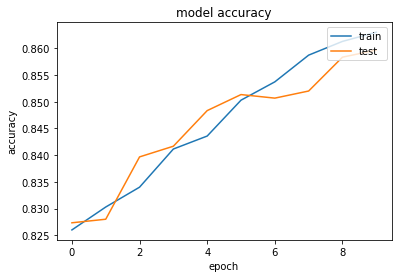

In [20]:
# summarize history for accuracy


plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

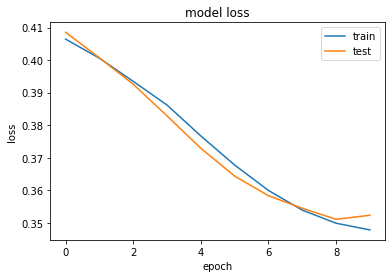

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [22]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8596666666666667

Text(0.5, 1, 'predictions')

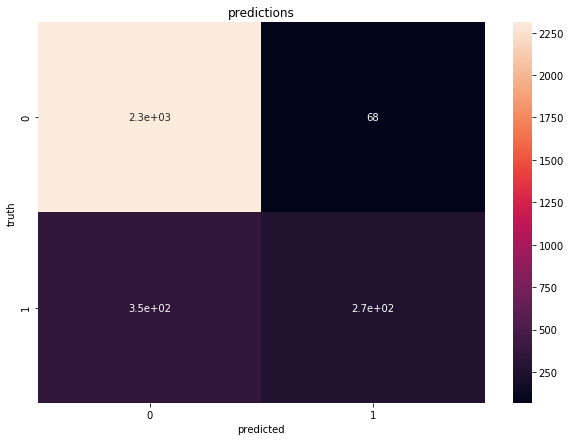

In [25]:
import seaborn as sn
plt.figure((figsize)=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("predictions")